In [9]:
from test_eos import *
import astro_const as ac
from structure import stellar_derivatives, central_values, lengthscales, integrate, pressure_guess
from eos import *

# 2.6 Test Integration

In [10]:
#Adjusting delta_m, eta, and xi
Pc = pressure_guess(ac.Msun, 2)
m,r,p = integrate(Pc, 1e-4,5e-7,.05,2)
print("M guess =",m[-1],"kg","  R guess =",r[-1],"m","  P guess =",p[-1],"kg/(m*s^2)")

delta_m = 1e-4
eta = 5e-7
xi = 0.05
mue=2

print("delta m =",delta_m)
print("eta =", eta)
print("xi =",xi)

M guess = 6.017661562880464e+30 kg   R guess = 6113223.207222233 m   P guess = 6.632678570496515e+17 kg/(m*s^2)
delta m = 0.0001
eta = 5e-07
xi = 0.05


In [11]:
#Finding High Pc
P_high = 3.34e22
m,r,p = integrate(P_high, 1e-4,5e-7,.05,2)
print("mass =" ,m[-1]/ac.Msun, "solar masses")
print("P high =", P_high)

mass = 1.006333384661577 solar masses
P high = 3.34e+22


In [12]:
#Finding low Pc
P_low = 1.51e19
m,r,p = integrate(P_low, 1e-4,5e-7,.05,2)
print("mass =",m[-1]/ac.Msun, "solar masses")
print("P low =", P_low)

mass = 0.09984147171549435 solar masses
P low = 1.51e+19


# 2.7 Make Mass Radius Table

In [13]:
#Function to use with bisect
def f(Pc,Mwant,delta_m,eta,xi,mue):
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    M = m[-1]
    return(M-Mwant)

In [16]:
#Finding optimized Pc for specific white dwarf masses between 0.1 and 1 solar masses
import pandas as pd
from scipy import optimize
masses = ac.Msun*np.arange(0.1,1.1,0.1)
P = np.zeros(10)
R = np.zeros(10)
Pmks = np.zeros(10)
rhomks = np.zeros(10)
rho = np.zeros(10)
for i in range(len(masses)):
    Pc = optimize.bisect(f,P_low,P_high,args = (masses[i],delta_m,eta,xi,mue))
    m,r,p = integrate(Pc,delta_m,eta,xi,mue)
    P[i] = Pc
    R[i] = r[-1]
    Pmks[i] = Pc/(ac.G*(masses[i])**2*R[i]**(-4))
    rhomks[i] = density(P[i],mue)
    rho[i] = rhomks[i]/((3*masses[i])/(ac.fourpi*R[i]**3))
    
diction = {"M/Msun":np.arange(.1,1.1,.1), "R/Rsun":R/ac.Rsun,"Pc": P,
          "Pc/stuff":Pmks, "rhoc": rhomks, "rho": rho}

table = pd.DataFrame(diction)
table.to_latex()

C:\Users\natha\AppData\Local\Temp\ipykernel_12260\2373358755.py:23: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.to_latex()


'\\begin{tabular}{lrrrrrr}\n\\toprule\n{} &  M/Msun &    R/Rsun &            Pc &  Pc/stuff &          rhoc &       rho \\\\\n\\midrule\n0 &     0.1 &  0.027382 &  1.518007e+19 &  0.757552 &  4.063113e+07 &  5.917101 \\\\\n1 &     0.2 &  0.021733 &  1.530055e+20 &  0.757563 &  1.625245e+08 &  5.917164 \\\\\n2 &     0.3 &  0.018986 &  5.911230e+20 &  0.757589 &  3.656802e+08 &  5.917318 \\\\\n3 &     0.4 &  0.017250 &  1.542199e+21 &  0.757574 &  6.500981e+08 &  5.917227 \\\\\n4 &     0.5 &  0.016014 &  3.244692e+21 &  0.757674 &  1.015778e+09 &  5.917817 \\\\\n5 &     0.6 &  0.015069 &  5.958146e+21 &  0.757600 &  1.462721e+09 &  5.917378 \\\\\n6 &     0.7 &  0.014314 &  9.960179e+21 &  0.757573 &  1.990925e+09 &  5.917221 \\\\\n7 &     0.8 &  0.013691 &  1.554439e+22 &  0.757585 &  2.600392e+09 &  5.917290 \\\\\n8 &     0.9 &  0.013164 &  2.301876e+22 &  0.757624 &  3.291121e+09 &  5.917519 \\\\\n9 &     1.0 &  0.012710 &  3.270445e+22 &  0.757685 &  4.063112e+09 &  5.917876 \\\\\n\\b

# 2.8 Compare to Observations

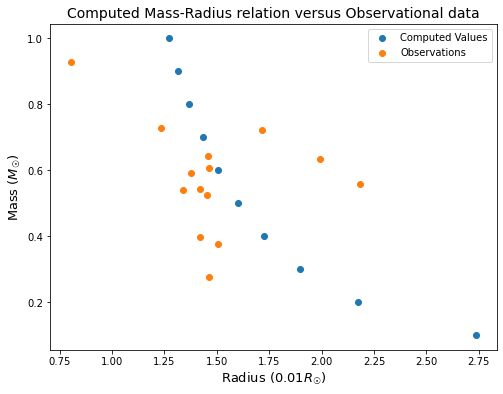

In [49]:
import matplotlib.pyplot as plt
from observations import MassRadiusObservations
obs = MassRadiusObservations()

plt.figure(figsize=(8,6))
plt.scatter(R/(0.01*ac.Rsun),masses/ac.Msun,label="Computed Values")
plt.scatter(obs.radii,obs.masses,label='Observations')
plt.xlabel("Radius ($0.01R_\u2609$)",fontsize=13)
plt.ylabel("Mass ($M_\u2609$)",fontsize=13)
plt.legend()
plt.title('Computed Mass-Radius relation versus Observational data',fontsize=14)
plt.show()